In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cf
import netCDF4
import pandas as pd
import datetime
import pytz 
from tzwhere import tzwhere
import math
from suntime import Sun
import scipy as sci
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import cdo

In [8]:
#loading deterministic datasets for central Europe for 2021 and 2022

T_2M_WU_cEU_nights_dim_hour_det_22 = xr.open_dataset('../T_2M_cEU_2022_data/T_2M_WU_cEU_nights_dim_hour_det_2022.nc')
T_2M_WU_cEU_days_dim_hour_det_22 = xr.open_dataset('../T_2M_cEU_2022_data/T_2M_WU_cEU_days_dim_hour_det_2022.nc')

T_2M_NU_cEU_nights_dim_hour_det_22 = xr.open_dataset('../T_2M_cEU_2022_data/T_2M_NU_cEU_nights_dim_hour_det_2022.nc')
T_2M_NU_cEU_days_dim_hour_det_22 = xr.open_dataset('../T_2M_cEU_2022_data/T_2M_NU_cEU_days_dim_hour_det_2022.nc')

T_2M_WU_cEU_nights_dim_hour_det_21 = xr.open_dataset('../T_2M_cEU_2021_data/T_2M_WU_cEU_nights_dim_hour_det_2021.nc')
T_2M_WU_cEU_days_dim_hour_det_21 = xr.open_dataset('../T_2M_cEU_2021_data/T_2M_WU_cEU_days_dim_hour_det_2021.nc')

T_2M_NU_cEU_nights_dim_hour_det_21 = xr.open_dataset('../T_2M_cEU_2021_data/T_2M_NU_cEU_nights_dim_hour_det_2021.nc')
T_2M_NU_cEU_days_dim_hour_det_21 = xr.open_dataset('../T_2M_cEU_2021_data/T_2M_NU_cEU_days_dim_hour_det_2021.nc')

In [6]:
#loading the ensemble dataset for central Europe for 2021 and 2022

In [17]:
T_2M_WU_cEU_nights_dim_hour_mem_22 = xr.open_dataset('../T_2M_cEU_2022_data/T_2M_WU_cEU_nights_dim_hour_mem_2022.nc')
T_2M_NU_cEU_nights_dim_hour_mem_22 = xr.open_dataset('../T_2M_cEU_2022_data/T_2M_NU_cEU_nights_dim_hour_mem_2022.nc')

T_2M_WU_cEU_days_dim_hour_mem_22 = xr.open_dataset('../T_2M_cEU_2022_data/T_2M_WU_cEU_days_dim_hour_mem_2022.nc')
T_2M_NU_cEU_days_dim_hour_mem_22 = xr.open_dataset('../T_2M_cEU_2022_data/T_2M_NU_cEU_days_dim_hour_mem_2022.nc')

T_2M_WU_cEU_nights_dim_hour_mem_21 = xr.open_dataset('../T_2M_cEU_2021_data/T_2M_WU_cEU_nights_dim_hour_mem_2021.nc')
T_2M_NU_cEU_nights_dim_hour_mem_21 = xr.open_dataset('../T_2M_cEU_2021_data/T_2M_NU_cEU_nights_dim_hour_mem_2021.nc')

T_2M_WU_cEU_days_dim_hour_mem_21 = xr.open_dataset('../T_2M_cEU_2021_data/T_2M_WU_cEU_days_dim_hour_mem_2021.nc')
T_2M_NU_cEU_days_dim_hour_mem_21 = xr.open_dataset('../T_2M_cEU_2021_data/T_2M_NU_cEU_days_dim_hour_mem_2021.nc')

In [58]:
mem_ids = []
for i in range(1, 21):
    mem_id = f'T_2M_WU_cEU_nights_dim_hour_memmem{i:03d}'
    mem_ids.append(mem_id)

all_values = []
mean_over_mem_WU_nights_cell_22 = {}

for cell in range(4):  # Assuming there are 4 cells
    for i, mem_id in enumerate(mem_ids, start=1):
        values = T_2M_WU_cEU_nights_dim_hour_mem_22[mem_id].isel(cell=cell).values
        all_values.append(values)

    all_values_array = np.array(all_values)
    mean_over_mem_WU_nights_cell_22[cell] = np.median(all_values_array, axis=0)
    all_values = [] 

In [62]:
mem_ids = []
for i in range(1, 21):
    mem_id = f'T_2M_WU_cEU_nights_dim_hour_memmem{i:03d}'
    mem_ids.append(mem_id)

all_values = []
mean_over_mem_WU_nights_cell_21 = {}

for cell in range(4):  # Assuming there are 4 cells
    for i, mem_id in enumerate(mem_ids, start=1):
        values = T_2M_WU_cEU_nights_dim_hour_mem_21[mem_id].isel(cell=cell).values
        all_values.append(values)

    all_values_array = np.array(all_values)
    mean_over_mem_WU_nights_cell_21[cell] = np.median(all_values_array, axis=0)
    all_values = [] 

In [59]:
mem_ids = []
for i in range(1, 21):
    mem_id = f'T_2M_NU_cEU_nights_dim_hour_memmem{i:03d}'
    mem_ids.append(mem_id)

all_values = []
mean_over_mem_NU_nights_cell_22 = {}

for cell in range(4):  # Assuming there are 4 cells
    for i, mem_id in enumerate(mem_ids, start=1):
        values = T_2M_NU_cEU_nights_dim_hour_mem_22[mem_id].isel(cell=cell).values
        all_values.append(values)

    all_values_array = np.array(all_values)
    mean_over_mem_NU_nights_cell_22[cell] = np.median(all_values_array, axis=0)
    all_values = [] 

In [63]:
mem_ids = []
for i in range(1, 21):
    mem_id = f'T_2M_NU_cEU_nights_dim_hour_memmem{i:03d}'
    mem_ids.append(mem_id)

all_values = []
mean_over_mem_NU_nights_cell_21 = {}

for cell in range(4):  # Assuming there are 4 cells
    for i, mem_id in enumerate(mem_ids, start=1):
        values = T_2M_NU_cEU_nights_dim_hour_mem_21[mem_id].isel(cell=cell).values
        all_values.append(values)

    all_values_array = np.array(all_values)
    mean_over_mem_NU_nights_cell_21[cell] = np.median(all_values_array, axis=0)
    all_values = [] 

In [60]:
mem_ids = []
for i in range(1, 21):
    mem_id = f'T_2M_WU_cEU_days_dim_hour_memmem{i:03d}'
    mem_ids.append(mem_id)

all_values = []
mean_over_mem_WU_days_cell_22 = {}

for cell in range(4):  # Assuming there are 4 cells
    for i, mem_id in enumerate(mem_ids, start=1):
        values = T_2M_WU_cEU_days_dim_hour_mem_22[mem_id].isel(cell=cell).values
        all_values.append(values)

    all_values_array = np.array(all_values)
    mean_over_mem_WU_days_cell_22[cell] = np.median(all_values_array, axis=0)
    all_values = [] 

In [64]:
mem_ids = []
for i in range(1, 21):
    mem_id = f'T_2M_WU_cEU_days_dim_hour_memmem{i:03d}'
    mem_ids.append(mem_id)

all_values = []
mean_over_mem_WU_days_cell_21 = {}

for cell in range(4):  # Assuming there are 4 cells
    for i, mem_id in enumerate(mem_ids, start=1):
        values = T_2M_WU_cEU_days_dim_hour_mem_21[mem_id].isel(cell=cell).values
        all_values.append(values)

    all_values_array = np.array(all_values)
    mean_over_mem_WU_days_cell_21[cell] = np.median(all_values_array, axis=0)
    all_values = [] 

In [61]:
mem_ids = []
for i in range(1, 21):
    mem_id = f'T_2M_NU_cEU_days_dim_hour_memmem{i:03d}'
    mem_ids.append(mem_id)

all_values = []
mean_over_mem_NU_days_cell_22 = {}

for cell in range(4):  # Assuming there are 4 cells
    for i, mem_id in enumerate(mem_ids, start=1):
        values = T_2M_NU_cEU_days_dim_hour_mem_22[mem_id].isel(cell=cell).values
        all_values.append(values)

    all_values_array = np.array(all_values)
    mean_over_mem_NU_days_cell_22[cell] = np.median(all_values_array, axis=0)
    all_values = [] 

In [65]:
mem_ids = []
for i in range(1, 21):
    mem_id = f'T_2M_NU_cEU_days_dim_hour_memmem{i:03d}'
    mem_ids.append(mem_id)

all_values = []
mean_over_mem_NU_days_cell_21 = {}

for cell in range(4):  # Assuming there are 4 cells
    for i, mem_id in enumerate(mem_ids, start=1):
        values = T_2M_NU_cEU_days_dim_hour_mem_21[mem_id].isel(cell=cell).values
        all_values.append(values)

    all_values_array = np.array(all_values)
    mean_over_mem_NU_days_cell_21[cell] = np.median(all_values_array, axis=0)
    all_values = [] 

In [66]:
sns.set_style("whitegrid")

/tmp/ipykernel_3546437/1784744246.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2*i].set_xticklabels(['2022', '2021'])
/tmp/ipykernel_3546437/1784744246.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2*i].set_xticklabels(['2022', '2021'])
/tmp/ipykernel_3546437/1784744246.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2*i].set_xticklabels(['2022', '2021'])
/tmp/ipykernel_3546437/1784744246.py:98: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2*i + 1].set_xticklabels(['2022', '2021'])
/tmp/ipykernel_3546437/1784744246.py:98: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2*i + 1].set_xticklabels(['2022', '2021'])
/tmp/ipykernel_3546437/1784744246.py:87: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2*i + 1].set_xticklabels(['2022', '2021'])


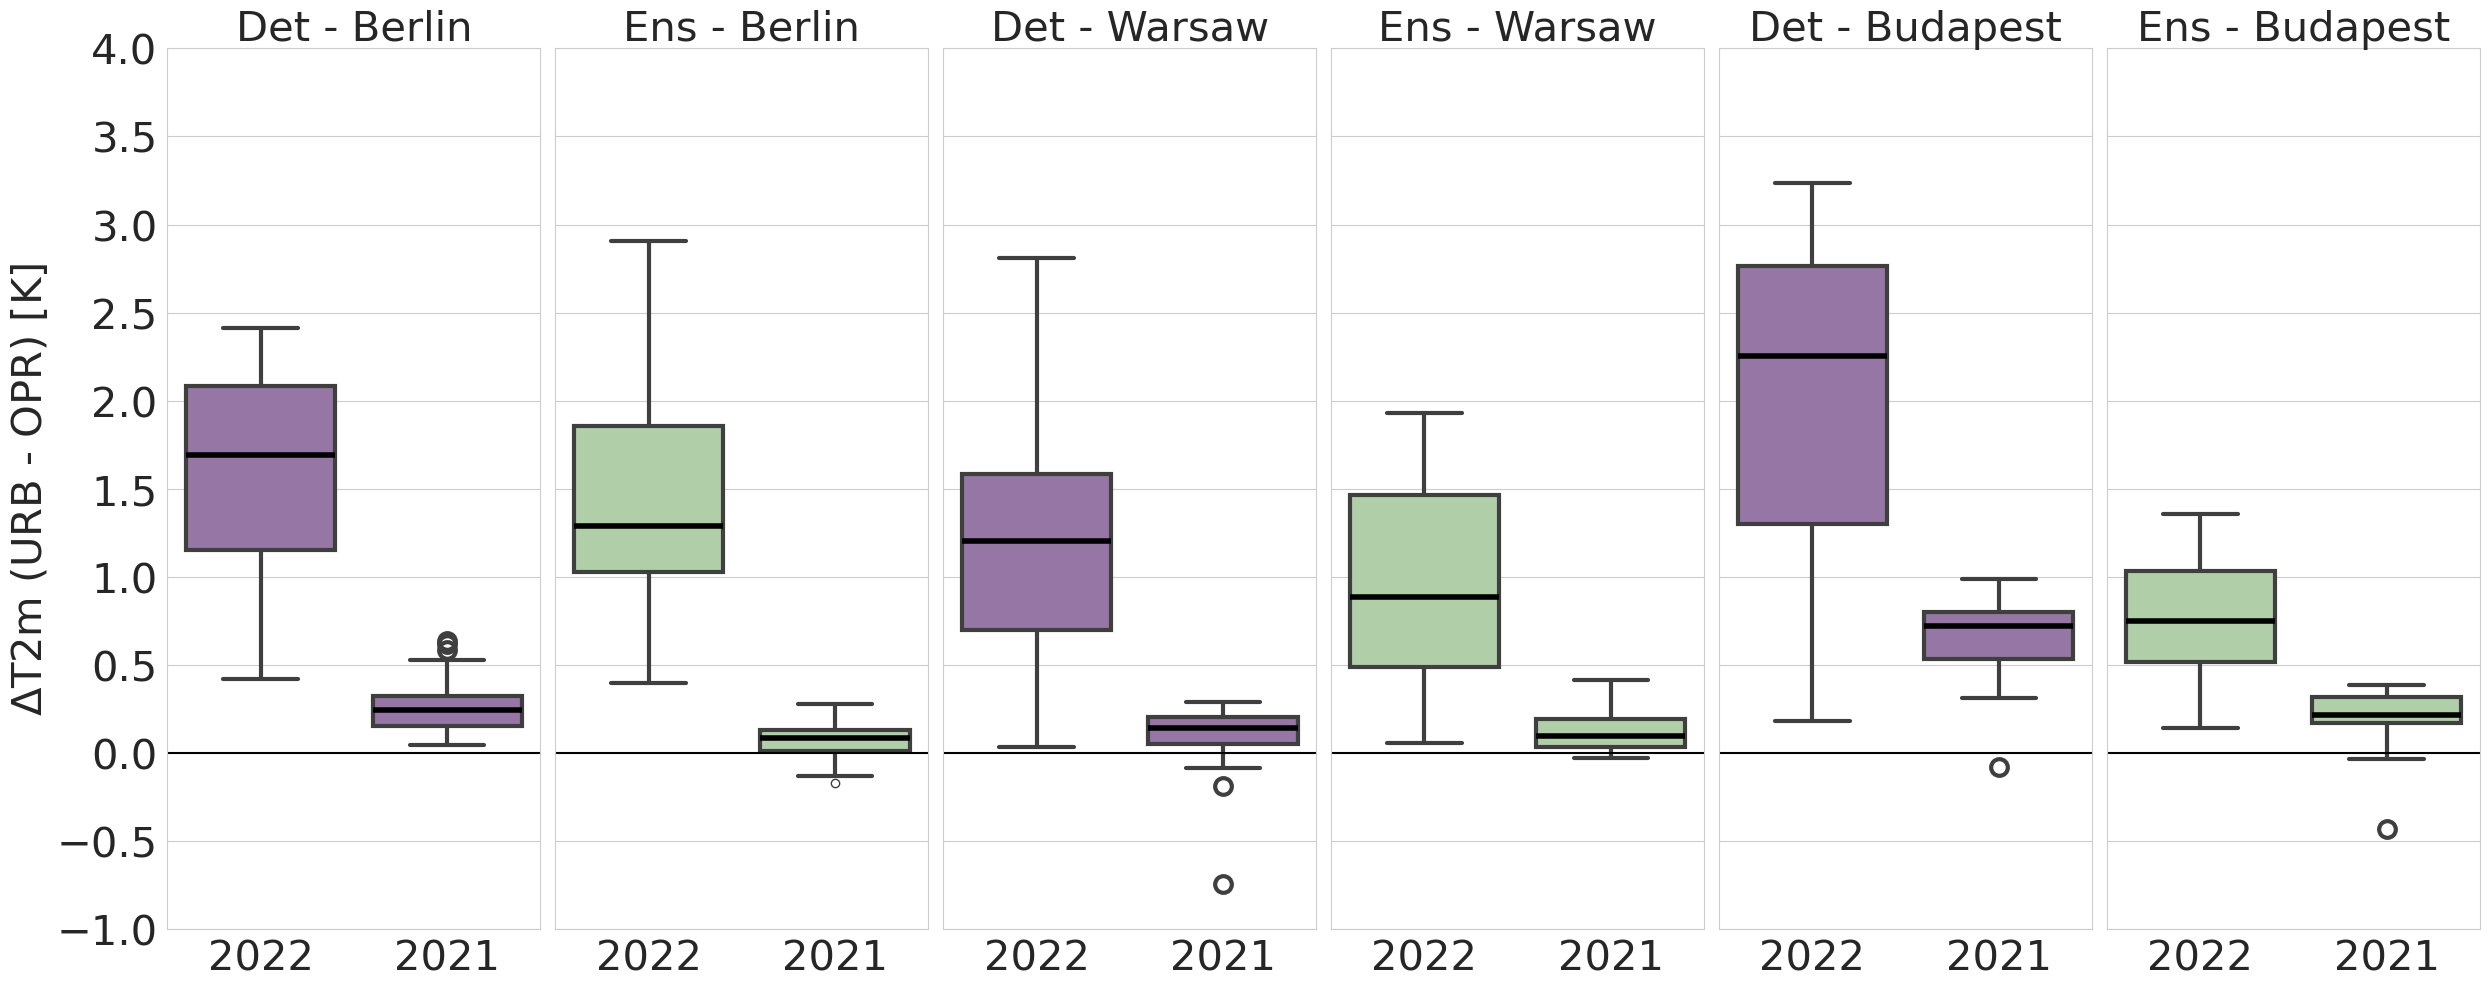

In [108]:
#differences central europe daytime, combinded Budapest

params = {'axes.labelsize': 30,'axes.titlesize':30, 'legend.fontsize': 30, 'xtick.labelsize': 30, 
          'ytick.labelsize': 30}
plt.rcParams.update(params)

medianprops = {'color': 'black', 'linewidth': 4}
flierprops = dict(markersize=12, linestyle='none', alpha=1, markeredgewidth=3)

num_members = 4
city_names = ['Berlin', 'Warsaw', 'Budapest']
num_cities = 3

y_min = -1
y_max = 4
step = .5
y_values = list(np.arange(y_min, y_max + step, step))

fig, axes = plt.subplots(ncols= 3 * 2, figsize=(25, 10))

# First for loop (odd-numbered subplots)
for i, city in enumerate(range(3)):  
    if city >= 2:  #combining budapest
        values_det_WU_budapest_22 = (
            T_2M_WU_cEU_nights_dim_hour_det_22.T_2M.isel(cell=2).values
            - T_2M_NU_cEU_nights_dim_hour_det_22.T_2M.isel(cell=2).values
            + T_2M_WU_cEU_nights_dim_hour_det_22.T_2M.isel(cell=3).values
            - T_2M_NU_cEU_nights_dim_hour_det_22.T_2M.isel(cell=3).values
        ) / 2
        values_det_WU_budapest_21 = (
            T_2M_WU_cEU_nights_dim_hour_det_21.T_2M.isel(cell=2).values
            - T_2M_NU_cEU_nights_dim_hour_det_21.T_2M.isel(cell=2).values
            + T_2M_WU_cEU_nights_dim_hour_det_21.T_2M.isel(cell=3).values
            - T_2M_NU_cEU_nights_dim_hour_det_21.T_2M.isel(cell=3).values
        ) / 2
        sns.boxplot(ax=axes[2*i], data=[values_det_WU_budapest_22,values_det_WU_budapest_21], color='#986EAC', linewidth= 3,
                      medianprops = medianprops, flierprops = flierprops)
        axes[2*i].set_title(f'Det - {city_names[city]}')
#        axes[i].set_ylabel('$\Delta$T2m (TERRA_URB - Operational) [K]')
        axes[2*i].set_ylim(y_min, y_max)
        axes[2*i].set_yticks(y_values)
        axes[2*i].axhline(y=0, color='black', linestyle='-')
        axes[2*i].axes.yaxis.set_ticklabels([])
        axes[2*i].set_xticklabels(['2022', '2021'])
#        axes[i].grid(True)
    else:
        values_det_WU_22 = T_2M_WU_cEU_nights_dim_hour_det_22.T_2M.isel(cell=city).values - T_2M_NU_cEU_nights_dim_hour_det_22.T_2M.isel(
            cell=city).values
        values_det_WU_21 = T_2M_WU_cEU_nights_dim_hour_det_21.T_2M.isel(cell=city).values - T_2M_NU_cEU_nights_dim_hour_det_21.T_2M.isel(
            cell=city).values
        
        sns.boxplot(ax=axes[2*i], data=[values_det_WU_22, values_det_WU_21], color='#986EAC', linewidth= 3, 
                    medianprops = medianprops, flierprops = flierprops)
        
        axes[2*i].set_title(f'Det - {city_names[city]}')
        if i == 0:
            axes[2*i].set_ylabel('$\Delta$T2m (URB - OPR) [K]')
        if i != 0:
            axes[2*i].axes.yaxis.set_ticklabels([])
        axes[2*i].set_ylim(y_min, y_max)
        axes[2*i].set_yticks(y_values)
        axes[2*i].axhline(y=0, color='black', linestyle='-')
        axes[2*i].set_xticklabels(['2022', '2021'])
 #       axes[i].grid(True)



for i, city in enumerate(range(3)):
    if city >= 2: #combining budapest
        values_wu_22 = (mean_over_mem_WU_nights_cell_22[2] 
                     - mean_over_mem_NU_nights_cell_22[2] 
                     + mean_over_mem_WU_nights_cell_22[3] 
                     - mean_over_mem_NU_nights_cell_22[3])/2

        values_wu_21 = (mean_over_mem_WU_nights_cell_21[2] 
                     - mean_over_mem_NU_nights_cell_21[2] 
                     + mean_over_mem_WU_nights_cell_21[3] 
                     - mean_over_mem_NU_nights_cell_21[3])/2
        
        sns.boxplot(ax=axes[2*i + 1], data=[values_wu_22,values_wu_21], color='#ADD4A0', linewidth = 3, 
                    medianprops = medianprops, flierprops = flierprops)
        axes[2*i + 1].set_title(f'Ens - {city_names[city]}')
        axes[2*i + 1].set_ylim(y_min, y_max)
        axes[2*i + 1].set_yticks(y_values)
        axes[2*i + 1].axhline(y=0, color='black', linestyle='-')
        axes[2*i + 1].axes.yaxis.set_ticklabels([])
        axes[2*i + 1].set_xticklabels(['2022', '2021'])

    else:
        values_wu_22 = mean_over_mem_WU_nights_cell_22[city] - mean_over_mem_NU_nights_cell_22[city]
        values_wu_21 = mean_over_mem_WU_nights_cell_21[city] - mean_over_mem_NU_nights_cell_21[city]
        sns.boxplot(ax=axes[2*i + 1], data=[values_wu_22, values_wu_21], color='#ADD4A0', linewidth = 3, medianprops = medianprops)
        axes[2*i + 1].set_title(f'Ens - {city_names[city]}')
        axes[2*i + 1].set_ylim(y_min, y_max)
        axes[2*i + 1].set_yticks(y_values)
        axes[2*i + 1].axhline(y=0, color='black', linestyle='-')
        axes[2*i + 1].axes.yaxis.set_ticklabels([])
        axes[2*i + 1].set_xticklabels(['2022', '2021'])

plt.tight_layout()
plt.savefig('../plots_2024/cEU_det_ens_diff_nights_combined_budapest_2022_2021_COMBINED.jpeg')
plt.show()


/tmp/ipykernel_3546437/623921611.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2*i].set_xticklabels(['2022', '2021'])
/tmp/ipykernel_3546437/623921611.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2*i].set_xticklabels(['2022', '2021'])
/tmp/ipykernel_3546437/623921611.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2*i].set_xticklabels(['2022', '2021'])
/tmp/ipykernel_3546437/623921611.py:98: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2*i + 1].set_xticklabels(['2022', '2021'])
/tmp/ipykernel_3546437/623921611.py:98: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2*i + 1].set_xticklabels(['2022', '2021'])
/tmp/ipykernel_3546437/623921611.py:87: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2*i + 1].set_xticklabels(['2022', '2021'])


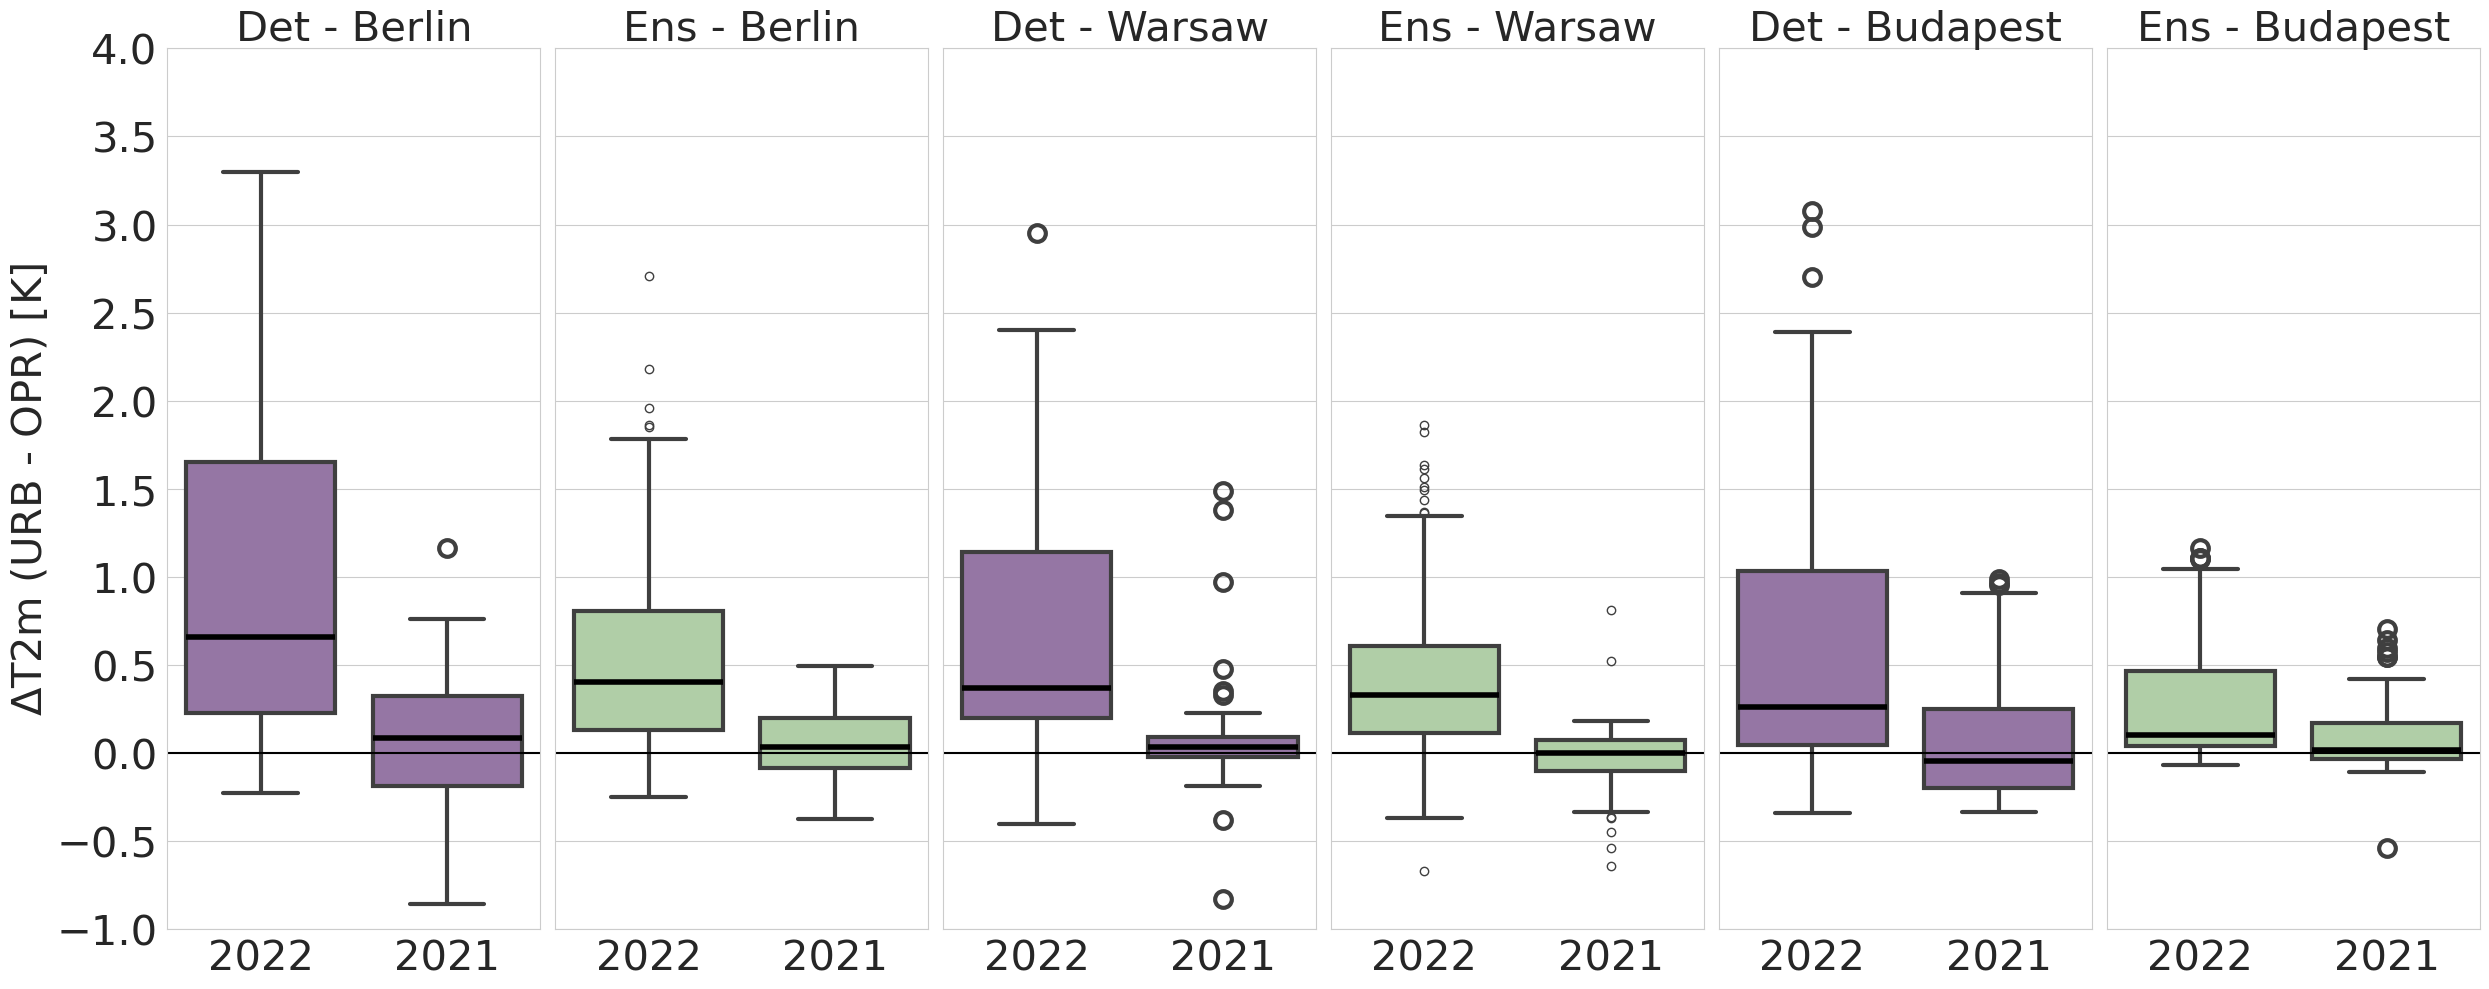

In [109]:
#differences central europe daytime, combinded Budapest

params = {'axes.labelsize': 30,'axes.titlesize':30, 'legend.fontsize': 30, 'xtick.labelsize': 30, 
          'ytick.labelsize': 30}
plt.rcParams.update(params)

medianprops = {'color': 'black', 'linewidth': 4}
flierprops = dict(markersize=12, linestyle='none', alpha=1, markeredgewidth=3)

num_members = 4
city_names = ['Berlin', 'Warsaw', 'Budapest']
num_cities = 3

y_min = -1
y_max = 4
step = .5
y_values = list(np.arange(y_min, y_max + step, step))

fig, axes = plt.subplots(ncols= 3 * 2, figsize=(25, 10))

# First for loop (odd-numbered subplots)
for i, city in enumerate(range(3)):  
    if city >= 2:  #combining budapest
        values_det_WU_budapest_22 = (
            T_2M_WU_cEU_days_dim_hour_det_22.T_2M.isel(cell=2).values
            - T_2M_NU_cEU_days_dim_hour_det_22.T_2M.isel(cell=2).values
            + T_2M_WU_cEU_days_dim_hour_det_22.T_2M.isel(cell=3).values
            - T_2M_NU_cEU_days_dim_hour_det_22.T_2M.isel(cell=3).values
        ) / 2
        values_det_WU_budapest_21 = (
            T_2M_WU_cEU_days_dim_hour_det_21.T_2M.isel(cell=2).values
            - T_2M_NU_cEU_days_dim_hour_det_21.T_2M.isel(cell=2).values
            + T_2M_WU_cEU_days_dim_hour_det_21.T_2M.isel(cell=3).values
            - T_2M_NU_cEU_days_dim_hour_det_21.T_2M.isel(cell=3).values
        ) / 2
        sns.boxplot(ax=axes[2*i], data=[values_det_WU_budapest_22,values_det_WU_budapest_21], color='#986EAC', linewidth= 3,
                      medianprops = medianprops, flierprops = flierprops)
        axes[2*i].set_title(f'Det - {city_names[city]}')
#        axes[i].set_ylabel('$\Delta$T2m (TERRA_URB - Operational) [K]')
        axes[2*i].set_ylim(y_min, y_max)
        axes[2*i].set_yticks(y_values)
        axes[2*i].axhline(y=0, color='black', linestyle='-')
        axes[2*i].axes.yaxis.set_ticklabels([])
        axes[2*i].set_xticklabels(['2022', '2021'])
#        axes[i].grid(True)
    else:
        values_det_WU_22 = T_2M_WU_cEU_days_dim_hour_det_22.T_2M.isel(cell=city).values - T_2M_NU_cEU_days_dim_hour_det_22.T_2M.isel(
            cell=city).values
        values_det_WU_21 = T_2M_WU_cEU_days_dim_hour_det_21.T_2M.isel(cell=city).values - T_2M_NU_cEU_days_dim_hour_det_21.T_2M.isel(
            cell=city).values
        
        sns.boxplot(ax=axes[2*i], data=[values_det_WU_22, values_det_WU_21], color='#986EAC', linewidth= 3, 
                    medianprops = medianprops, flierprops = flierprops)
        
        axes[2*i].set_title(f'Det - {city_names[city]}')
        if i == 0:
            axes[2*i].set_ylabel('$\Delta$T2m (URB - OPR) [K]')
        if i != 0:
            axes[2*i].axes.yaxis.set_ticklabels([])
        axes[2*i].set_ylim(y_min, y_max)
        axes[2*i].set_yticks(y_values)
        axes[2*i].axhline(y=0, color='black', linestyle='-')
        axes[2*i].set_xticklabels(['2022', '2021'])
 #       axes[i].grid(True)



for i, city in enumerate(range(3)):
    if city >= 2: #combining budapest
        values_wu_22 = (mean_over_mem_WU_days_cell_22[2] 
                     - mean_over_mem_NU_days_cell_22[2] 
                     + mean_over_mem_WU_days_cell_22[3] 
                     - mean_over_mem_NU_days_cell_22[3])/2

        values_wu_21 = (mean_over_mem_WU_days_cell_21[2] 
                     - mean_over_mem_NU_days_cell_21[2] 
                     + mean_over_mem_WU_days_cell_21[3] 
                     - mean_over_mem_NU_days_cell_21[3])/2
        
        sns.boxplot(ax=axes[2*i + 1], data=[values_wu_22,values_wu_21], color='#ADD4A0', linewidth = 3, 
                    medianprops = medianprops, flierprops = flierprops)
        axes[2*i + 1].set_title(f'Ens - {city_names[city]}')
        axes[2*i + 1].set_ylim(y_min, y_max)
        axes[2*i + 1].set_yticks(y_values)
        axes[2*i + 1].axhline(y=0, color='black', linestyle='-')
        axes[2*i + 1].axes.yaxis.set_ticklabels([])
        axes[2*i + 1].set_xticklabels(['2022', '2021'])

    else:
        values_wu_22 = mean_over_mem_WU_days_cell_22[city] - mean_over_mem_NU_days_cell_22[city]
        values_wu_21 = mean_over_mem_WU_days_cell_21[city] - mean_over_mem_NU_days_cell_21[city]
        sns.boxplot(ax=axes[2*i + 1], data=[values_wu_22, values_wu_21], color='#ADD4A0', linewidth = 3, medianprops = medianprops)
        axes[2*i + 1].set_title(f'Ens - {city_names[city]}')
        axes[2*i + 1].set_ylim(y_min, y_max)
        axes[2*i + 1].set_yticks(y_values)
        axes[2*i + 1].axhline(y=0, color='black', linestyle='-')
        axes[2*i + 1].axes.yaxis.set_ticklabels([])
        axes[2*i + 1].set_xticklabels(['2022', '2021'])

plt.tight_layout()
plt.savefig('../plots_2024/cEU_det_ens_diff_nights_combined_budapest_2022_2021_COMBINED.jpeg')
plt.show()
